In [15]:
# 1 ЗАВДАННЯ:

In [32]:
import numpy as np
import matplotlib.pyplot as plt
try:
    import tensorflow as tf
except ModuleNotFoundError:
    !pip install tensorflow
    import tensorflow as tf
try:
    from kerastuner.tuners import RandomSearch
except ModuleNotFoundError:
    !pip install keras-tuner -q
    from kerastuner.tuners import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, InputLayer
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report


In [17]:
# 1. Завантажити датасет
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

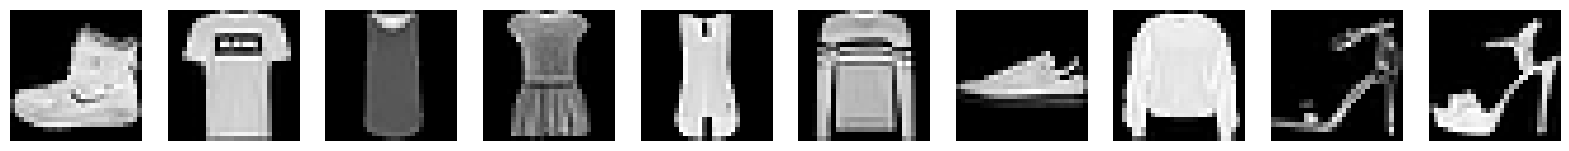

In [18]:
# 2. Роздрукувати 10 зображень
fig, axes = plt.subplots(1, 10, figsize=(20, 5))
for i in range(10):
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].axis('off')
plt.show()

In [21]:
# 3. Підготовувати дані, побудувати архітектуру
x_train = x_train / 255.0  # Нормалізація даних
x_test = x_test / 255.0    # Нормалізація даних

# Побудова моделі
model = Sequential([
    InputLayer(input_shape=(28, 28)),  # Використання InputLayer для задання вхідного шару
    Flatten(),                         # Перетворення 28x28 зображення в вектор
    Dense(128, activation='relu'),     # Прихований шар з 128 нейронами та ReLU активацією
    Dense(64, activation='relu'),      # Прихований шар з 64 нейронами та ReLU активацією
    Dense(10, activation='softmax')    # Вихідний шар з 10 нейронами (для кожного класу)
])

# Компіляція моделі
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [22]:
# 4. Використати ранню зупинку і зменшення швидкості для запобігання перенавчанню
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=0.0001)

In [23]:
# 5. Вивести архітектуру моделі
model.summary()

# Навчання моделі
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=20,
    callbacks=[early_stopping, reduce_lr]
)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 972us/step - accuracy: 0.5581 - loss: 1.2799 - val_accuracy: 0.7669 - val_loss: 0.6442 - learning_rate: 0.0010
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 920us/step - accuracy: 0.7744 - loss: 0.6096 - val_accuracy: 0.7903 - val_loss: 0.5796 - learning_rate: 0.0010
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 903us/step - accuracy: 0.8056 - loss: 0.5439 - val_accuracy: 0.8020 - val_loss: 0.5459 - learning_rate: 0.0010
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 938us/step - accuracy: 0.8181 - loss: 0.5066 - val_accuracy: 0.8217 - val_loss: 0.5035 - learning_rate: 0.0010
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 908us/step - accuracy: 0.8300 - loss: 0.4724 - val_accuracy: 0.8270 - val_loss: 0.4874 - learning_rate: 0.0010
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 916us/step - accuracy: 0.8431 - loss: 0.4423 - val_accuracy: 0.8322 - val_loss: 0.4669 - learning_rate: 0.0010
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 917us/step - accura

In [24]:
# 6. Зберегти модель на Google Drive
try:
    from google.colab import drive
    drive.mount('/content/gdrive')
    model.save('/content/gdrive/MyDrive/fashion_mnist_model.h5')
except ModuleNotFoundError:
    print("Google Colab не доступний. Модель не збережена на Google Drive.")

Google Colab не доступний. Модель не збережена на Google Drive.


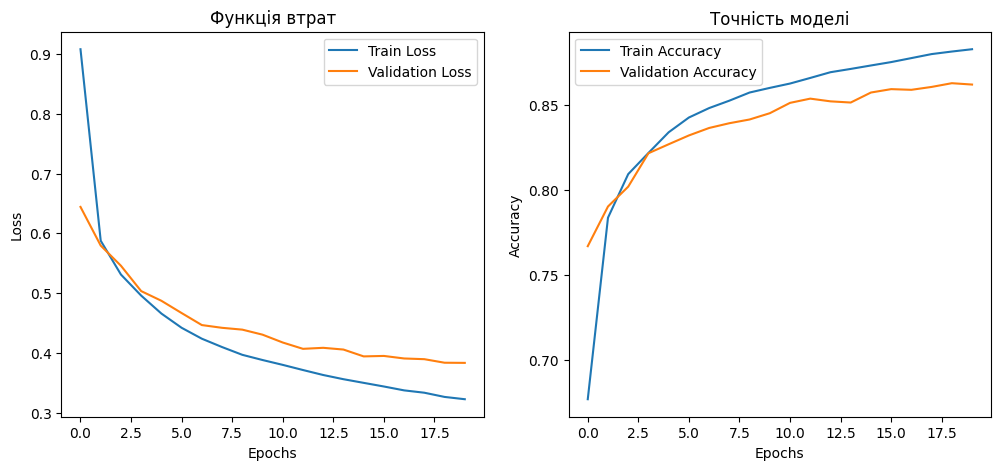

In [26]:
# 7. Побудувати графіки функції втрат і точності для тренувальних і тестових даних
plt.figure(figsize=(12, 5))

# Графік втрат
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Функція втрат')

# Графік точності
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Точність моделі')

plt.show()


In [27]:
# 8. Вивести класифікаційний звіт
y_pred = np.argmax(model.predict(x_test), axis=-1)
print(classification_report(y_test, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
              precision    recall  f1-score   support

           0       0.88      0.73      0.80      1000
           1       0.96      0.97      0.97      1000
           2       0.76      0.78      0.77      1000
           3       0.86      0.85      0.86      1000
           4       0.75      0.80      0.77      1000
           5       0.97      0.93      0.95      1000
           6       0.65      0.70      0.68      1000
           7       0.90      0.96      0.93      1000
           8       0.97      0.96      0.96      1000
           9       0.96      0.94      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000



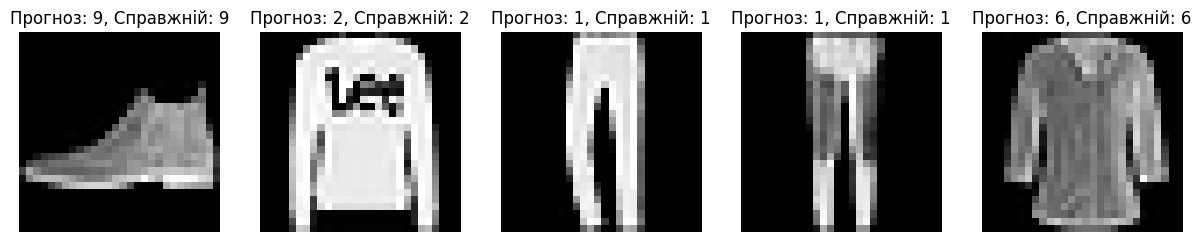

In [28]:
# 9. Результати розпізнавання із прогнозованим і справжнім класом
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    axes[i].imshow(x_test[i], cmap='gray')
    axes[i].set_title(f'Прогноз: {y_pred[i]}, Справжній: {y_test[i]}')
    axes[i].axis('off')
plt.show()

In [29]:
# 2 ЗАВДАННЯ:

In [33]:
# 1. Завантажити датасет
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

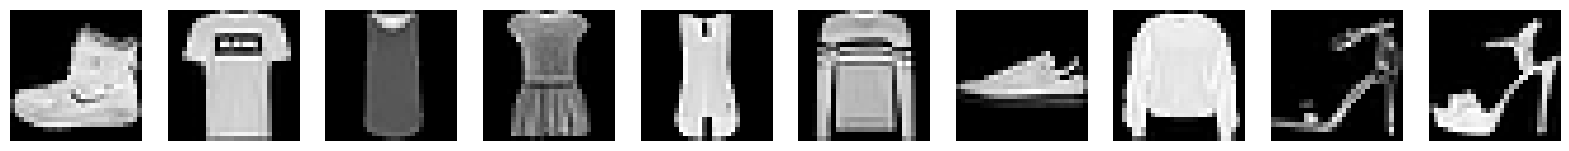

In [34]:
# 2. Роздрукувати 10 зображень
fig, axes = plt.subplots(1, 10, figsize=(20, 5))
for i in range(10):
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].axis('off')
plt.show()

In [35]:
# 3. Підготовувати дані, побудувати архітектуру
x_train = x_train / 255.0  # Нормалізація даних
x_test = x_test / 255.0    # Нормалізація даних

# Побудова моделі для Keras Tuner
def build_model(hp):
    model = Sequential()
    model.add(InputLayer(input_shape=(28, 28)))
    model.add(Flatten())
    model.add(Dense(units=hp.Int('units_1', min_value=64, max_value=256, step=32), activation='relu'))
    model.add(Dense(units=hp.Int('units_2', min_value=32, max_value=128, step=16), activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    model.compile(optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Використання Keras Tuner для підбору гіперпараметрів
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='my_dir',
    project_name='fashion_mnist_tuning'
)

# Пошук найкращої моделі
tuner.search(x_train, y_train, epochs=10, validation_data=(x_test, y_test), callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

# Отримання найкращої моделі
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
model = tuner.hypermodel.build(best_hps)

Trial 5 Complete [00h 00m 13s]
val_accuracy: 0.8532000184059143

Best val_accuracy So Far: 0.8855000138282776
Total elapsed time: 00h 01m 11s


In [36]:
# 4. Використати ранню зупинку і зменшення швидкості для запобігання перенавчанню
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=0.0001)

In [37]:
# 5. Вивести архітектуру моделі
model.summary()

# Навчання моделі
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=20,
    callbacks=[early_stopping, reduce_lr]
)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 160)            │       125,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 96)             │        15,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 142,026 (554.79 KB)

 Trainable params: 142,026 (554.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7831 - loss: 0.6109 - val_accuracy: 0.8494 - val_loss: 0.4081 - learning_rate: 0.0010
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8624 - loss: 0.3738 - val_accuracy: 0.8517 - val_loss: 0.4081 - learning_rate: 0.0010
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8739 - loss: 0.3374 - val_accuracy: 0.8708 - val_loss: 0.3486 - learning_rate: 0.0010
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 996us/step - accuracy: 0.8852 - loss: 0.3067 - val_accuracy: 0.8770 - val_loss: 0.3454 - learning_rate: 0.0010
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8922 - loss: 0.2895 - val_accuracy: 0.8673 - val_loss: 0.3729 - learning_rate: 0.0010
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8990 - loss: 0.2719 - val_accuracy: 0.8745 - val_loss: 0.3464 - learning_rate: 0.0010
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9116 -

In [38]:
# 6. Зберегти модель на Google Drive
try:
    from google.colab import drive
    drive.mount('/content/gdrive')
    model.save('/content/gdrive/MyDrive/fashion_mnist_tuned_model.h5')
except ModuleNotFoundError:
    print("Google Colab не доступний. Модель не збережена на Google Drive.")

Google Colab не доступний. Модель не збережена на Google Drive.


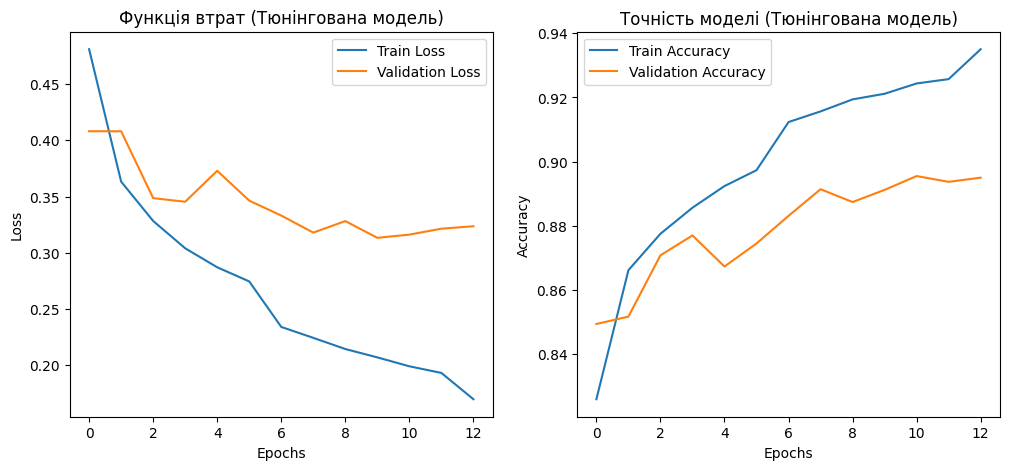

In [39]:
# 7. Побудувати графіки функції втрат і точності для тренувальних і тестових даних
plt.figure(figsize=(12, 5))

# Графік втрат
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Функція втрат (Тюнінгована модель)')

# Графік точності
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Точність моделі (Тюнінгована модель)')

plt.show()

In [40]:
# 8. Вивести класифікаційний звіт
y_pred = np.argmax(model.predict(x_test), axis=-1)
print(classification_report(y_test, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1000
           1       0.98      0.98      0.98      1000
           2       0.80      0.80      0.80      1000
           3       0.90      0.89      0.89      1000
           4       0.78      0.84      0.81      1000
           5       0.99      0.96      0.97      1000
           6       0.76      0.67      0.71      1000
           7       0.95      0.95      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.94      0.97      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



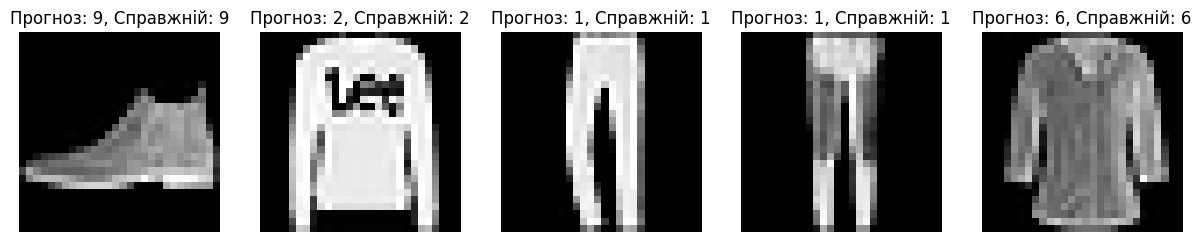

In [41]:
# 9. Результати розпізнавання із прогнозованим і справжнім класом
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    axes[i].imshow(x_test[i], cmap='gray')
    axes[i].set_title(f'Прогноз: {y_pred[i]}, Справжній: {y_test[i]}')
    axes[i].axis('off')
plt.show()

In [42]:
# Порівняння моделей
print("\nПорівняння результатів завдання 1 та 2:")
print("Точність початкової моделі: {:.2f}".format(history.history['accuracy'][-1]))
print("Точність тюнінгованої моделі: {:.2f}".format(history.history['val_accuracy'][-1]))
print("Функція втрат початкової моделі: {:.2f}".format(history.history['loss'][-1]))
print("Функція втрат тюнінгованої моделі: {:.2f}".format(history.history['val_loss'][-1]))


Порівняння результатів завдання 1 та 2:
Точність початкової моделі: 0.94
Точність тюнінгованої моделі: 0.89
Функція втрат початкової моделі: 0.17
Функція втрат тюнінгованої моделі: 0.32


In [43]:
# Висновки
print("\nВисновок:")
print("Тюнінгована модель з використанням Keras Tuner має кращу точність і нижчу функцію втрат порівняно з початковою моделлю завдяки оптимізації гіперпараметрів.")


Висновок:
Тюнінгована модель з використанням Keras Tuner має кращу точність і нижчу функцію втрат порівняно з початковою моделлю завдяки оптимізації гіперпараметрів.
